In [1]:
%reset
%load_ext autoreload
%autoreload 2

import sys

sys.path.append("../")
import torch
import numpy as np
import defmod as dm
import multimodule_usefulfunctions as mm 
import matplotlib.pyplot as plt
import defmod.hamiltonian_multishape as hamiltonian
import model_MultiShapeCirclesTranslation as model

torch.set_default_tensor_type(torch.DoubleTensor)


Once deleted, variables cannot be recovered. Proceed (y/[n])? y


In [2]:
nb_pts1 = 10
nb_pts2 = 7
dim = 2

o1 = torch.tensor([0.,0.])
o2 = torch.tensor([10.,0.])
origin = [o1,o2]
r1 = 1.
r2 = 2.
radius = [r1, r2]
nb_pts = [nb_pts1, nb_pts2]
source = mm.multipleCircles(origin, radius, nb_pts)

origin_target = [[0,5], [10,-5]]
target = mm.multipleCircles(origin, [2., 1.], nb_pts)

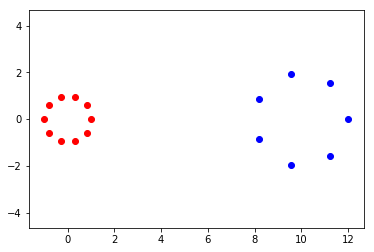

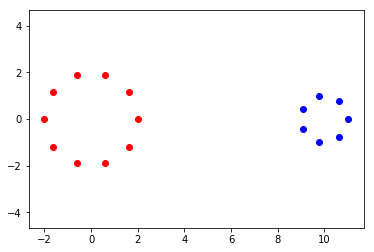

In [3]:
plt.figure()
plt.scatter(source[0][:, 0].detach().numpy(), source[0][:, 1].detach().numpy(), c='red')
plt.scatter(source[1][:, 0].detach().numpy(), source[1][:, 1].detach().numpy(), c='blue')
plt.axis('equal')

plt.figure()
plt.scatter(target[0][:, 0].detach().numpy(), target[0][:, 1].detach().numpy(), c='red')
plt.scatter(target[1][:, 0].detach().numpy(), target[1][:, 1].detach().numpy(), c='blue')

plt.axis('equal')
plt.show()

In [4]:
# Defining the deformation modules
sigma1 = 3
manifold1 = dm.manifold.Landmarks(dim, nb_pts1, gd=source[0].view(-1))
trans1 = dm.deformationmodules.Translations(manifold1, sigma1)
scal1 = dm.deformationmodules.GlobalScaling(manifold1, sigma1)
mod1 = dm.deformationmodules.CompoundModule([trans1, scal1])

sigma2 = 3
manifold2 = dm.manifold.Landmarks(dim, nb_pts2, gd=source[1].view(-1))
trans2 = dm.deformationmodules.Translations(manifold2, sigma2)
scal2 = dm.deformationmodules.GlobalScaling(manifold2, sigma2)
mod2 = dm.deformationmodules.CompoundModule([trans2, scal2])

module_list = [mod1, scal2]
sigma_bg = 0.1
modules = dm.multishape.MultiShapeModule(module_list, sigma_bg)

In [5]:
constr_Id = dm.constraints.Identity()
H = hamiltonian.Hamiltonian_multi(modules, constr_Id)

In [6]:
modules.background.autoaction().shape

torch.Size([54, 54])

In [7]:
gd0_list = modules.manifold.gd
mom0_list = modules.manifold.roll_cotan([torch.zeros(modules.manifold.unroll_gd()[i].shape) for i in range(len(modules.manifold.unroll_gd()))])

H.module.manifold.fill_cotan(mom0_list)
H.geodesic_controls()

RuntimeError: Lapack Error in gesv : U(40,40) is zero, singular U. at /opt/conda/conda-bld/pytorch_1544174967633/work/aten/src/TH/generic/THTensorLapack.cpp:155

In [9]:
modules.module_list[0].autoaction()

tensor([[ 8.1301e+00,  5.1132e-17,  8.1158e+00,  ..., -2.1434e-02,
          8.1158e+00, -1.2873e-02],
        [ 5.1132e-17,  8.1065e+00,  4.0675e-17,  ...,  8.0722e+00,
          4.0675e-17,  8.0970e+00],
        [ 8.1158e+00,  4.0675e-17,  8.1215e+00,  ..., -1.7051e-02,
          8.0871e+00, -1.0241e-02],
        ...,
        [-2.1434e-02,  8.0722e+00, -1.7051e-02,  ...,  8.1260e+00,
         -1.7051e-02,  8.1087e+00],
        [ 8.1158e+00,  4.0675e-17,  8.0871e+00,  ..., -1.7051e-02,
          8.1215e+00, -1.0241e-02],
        [-1.2873e-02,  8.0970e+00, -1.0241e-02,  ...,  8.1087e+00,
         -1.0241e-02,  8.1136e+00]], grad_fn=<MmBackward>)